In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

In [3]:
file_path='C:/Users/Himakar Reddy/Downloads/testset.csv'
df=pd.read_csv(file_path)

In [4]:
df.head()


,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [5]:
df.describe()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,0.0,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,NaN,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,NaN,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

In [7]:
df.columns


Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [8]:
df.isnull().sum()


datetime_utc         0
 _conds             72
 _dewptm           621
 _fog                0
 _hail               0
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _rain               0
 _snow               0
 _tempm            673
 _thunder            0
 _tornado            0
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum()

datetime_utc         0
 _conds             72
 _dewptm           621
 _fog                0
 _hail               0
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _rain               0
 _snow               0
 _tempm            673
 _thunder            0
 _tornado            0
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
dtype: int64

In [11]:
df.fillna(df.mean(numeric_only=True),inplace=True)

In [12]:
df=pd.get_dummies(df,columns=[ ' _precipm'])

In [13]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,35.65171,27.0,1010.0,0,0,30.0,0,0,5.000000,280.0,West,37.671175,5.713817,7.400000
1,19961101-12:00,Smoke,10.0,0,0,35.65171,32.0,-9999.0,0,0,28.0,0,0,2.402774,0.0,North,37.671175,5.713817,7.678463
2,19961101-13:00,Smoke,11.0,0,0,35.65171,44.0,-9999.0,0,0,24.0,0,0,2.402774,0.0,North,37.671175,5.713817,7.678463
3,19961101-14:00,Smoke,10.0,0,0,35.65171,41.0,1010.0,0,0,24.0,0,0,2.000000,0.0,North,37.671175,5.713817,7.678463
4,19961101-16:00,Smoke,11.0,0,0,35.65171,47.0,1011.0,0,0,23.0,0,0,1.200000,0.0,North,37.671175,5.713817,0.000000


In [14]:
scaler=StandardScaler()
df[[' _tempm',' _hum']]=scaler.fit_transform(df[[' _tempm',' _hum']])

In [15]:
scaler=MinMaxScaler()
df[[' _tempm',' _hum']]=scaler.fit_transform(df[[' _tempm',' _hum']])

In [40]:
df.drop(columns=[' _conds'],inplace=True)
df.drop(columns=[' _wdire'],inplace=True)


In [30]:
df.head()

,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm,new_feature,log_feature
0,Smoke,9.0,0,0,35.65171,0.096234,1010.0,0,0,0.325843,0,0,5.000000,280.0,37.671175,5.713817,7.400000,97.196653,0.282048
1,Smoke,10.0,0,0,35.65171,0.117155,-9999.0,0,0,0.303371,0,0,2.402774,0.0,37.671175,5.713817,7.678463,-1171.430962,0.264954
2,Smoke,11.0,0,0,35.65171,0.167364,-9999.0,0,0,0.258427,0,0,2.402774,0.0,37.671175,5.713817,7.678463,-1673.472803,0.229863
3,Smoke,10.0,0,0,35.65171,0.154812,1010.0,0,0,0.258427,0,0,2.000000,0.0,37.671175,5.713817,7.678463,156.359833,0.229863
4,Smoke,11.0,0,0,35.65171,0.179916,1011.0,0,0,0.247191,0,0,1.200000,0.0,37.671175,5.713817,0.000000,181.895397,0.220894


<Axes: xlabel=' _tempm'>

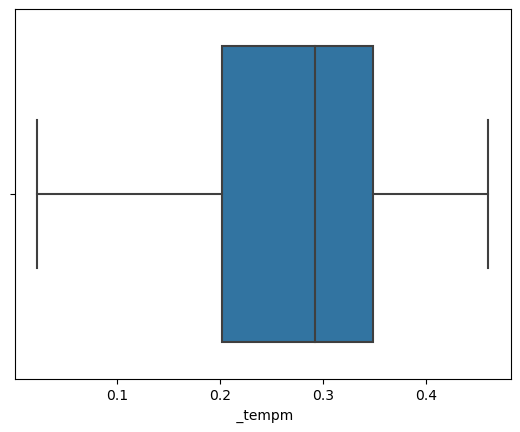

In [31]:
sns.boxplot(x=df[' _tempm'])


In [32]:
Q1 = df[' _tempm'].quantile(0.20)
Q3 = df[' _tempm'].quantile(0.50)
IQR = Q3 - Q1

df = df[(df[' _tempm'] >= (Q1 - 1.5 * IQR)) & (df[' _tempm'] <= (Q3 + 1.5 * IQR))]

<Axes: xlabel=' _tempm'>

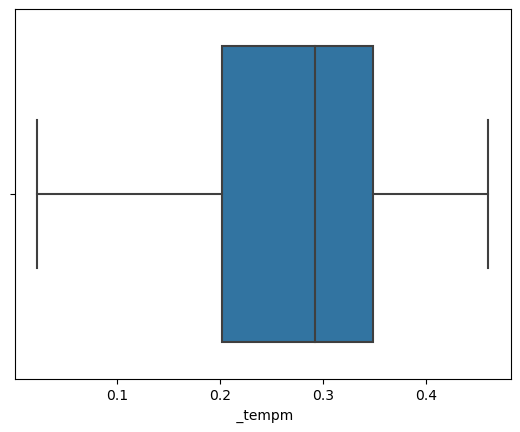

In [33]:
sns.boxplot(x=df[' _tempm'])

In [42]:
# Create a new feature
df['new_feature'] = df[' _hum'] * df[' _pressurem']

# Log transformation
df['log_feature'] = np.log(df[' _tempm'] + 1)

In [43]:
from sklearn.model_selection import train_test_split

X = df.drop(' _tempm', axis=1)
y = df[' _tempm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [45]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred = model.predict(X_test)

In [47]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

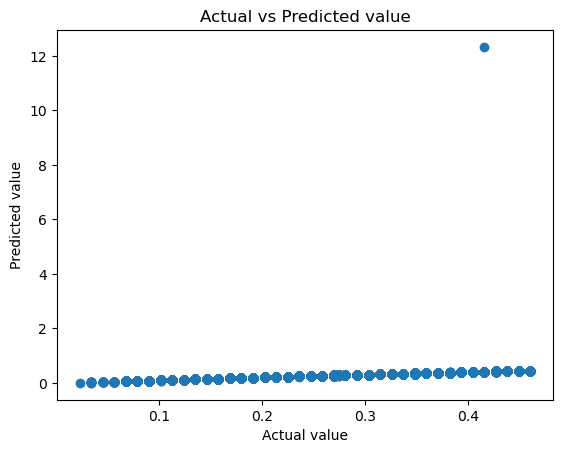

In [48]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("Actual vs Predicted value")
plt.show()

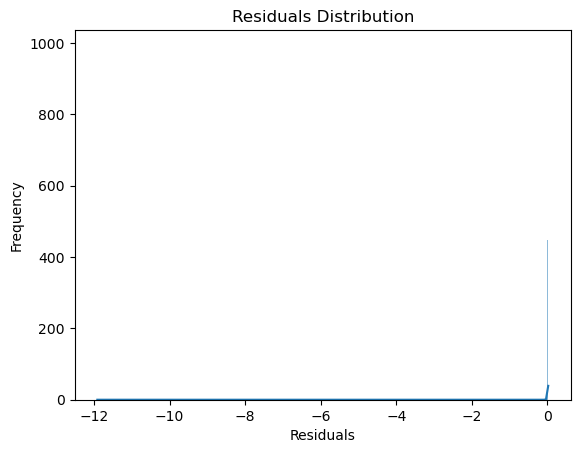

In [49]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()

In [50]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)
print(r2)

0.0070902439363506285
0.1941773441782133
